In [1]:
import multiprocessing
from multiprocessing.shared_memory import SharedMemory
import time
import numpy as np
import random
from fastplotlib import Plot
from fastplotlib.layouts import GridPlot
from functools import partial
import time

In [2]:
# Sync & Mem Managers
def create_event_flags():
    generate_ef = multiprocessing.Event()
    acquire_ef = multiprocessing.Event()
    return generate_ef, acquire_ef

def create_mutex():
    mutex = multiprocessing.Lock()
    return mutex

# Initialize (Grid) Plot
def create_grid_plot():
    grid_shape = (2, 3)

    controllers = [
        [0, 3, 1],  
        [2, 2, 3]
    ]

    names = [
        ["subplot0", "subplot1", "subplot2"],
        ["subplot3", "subplot4", "subplot5"]
    ]

    grid_plot = GridPlot(
        shape=grid_shape,
        controllers=controllers,
        names=names
    )

    return grid_plot

def create_plot():
    plot = Plot()
    return plot

def initialize_plot(plot):
    xs = np.linspace(0,1000,1000)
    ys = np.array(random.sample(range(0,1000), 1000))
    data = np.dstack([xs,ys])[0]
    plot.add_line(data=data, name='idiot', cmap='jet')
    return data

def initialize_grid_plot(grid_plot):
    pass
    return

In [3]:
# Create Shared Memory Object
def create_shared_block(plot):
    data = initialize_plot(plot)
    shm = SharedMemory(create=True, size=data.nbytes)
    data_shared = np.ndarray(shape=data.shape, 
                             dtype=np.int64, buffer=shm.buf)
    data_shared[:] = data[:]
    return shm, data_shared

In [4]:
# Modify Data
def update_data(shm_name, mutex):
    while True:
        shm = SharedMemory(shm_name)
        ys = random.sample(range(0,1000), window_length)
        mutex.acquire()
        data_shared = np.ndarray(shape=shape, dtype=dtype, buffer=shm.buf)
        xs = data_shared[-window_length:,0]
        new_data = np.dstack([xs, ys])[0]
        data_shared[:-window_length] = data_shared[window_length:] - [window_length,0]
        data_shared[-window_length:] = new_data
        mutex.release()
def obtain_data(shm_name, mutex):
    shm = SharedMemory(shm_name)
    mutex.acquire()
    data_shared = np.ndarray(shape=shape, dtype=dtype, buffer=shm.buf)
    mutex.release()
    plot['idiot'].data = data_shared

RFBOutputContext()


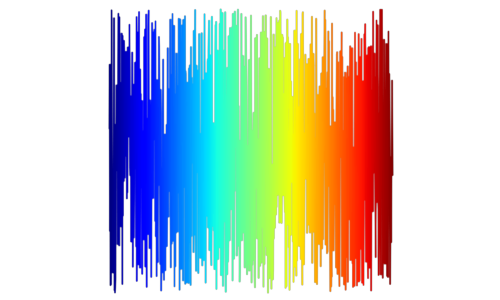

JupyterWgpuCanvas()

In [6]:
# Initialize global vars
global shape, dtype, window_length
# Define how many data points you want to generate at a time
window_length=10
# Create plot and shared memory block
plot = create_plot()
shm, data = create_shared_block(plot)
# Define global vars
shape, dtype = data.shape, data.dtype
# Create mutex
mutex = create_mutex()
# Define process
p1 = multiprocessing.Process(name='update', 
                             target=update_data,
                             args=(shm.name, mutex, ))

# Start process and plotting
p1.start()
plot.add_animations(partial(obtain_data, shm.name, mutex,))
plot.show()